# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

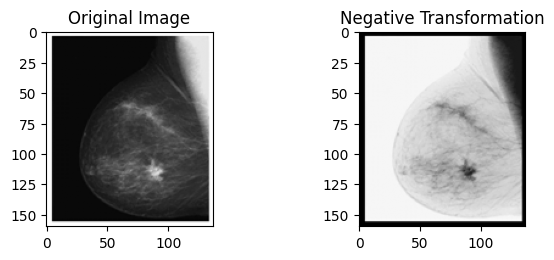

In [ ]:
pic1 = io.imread('imgs/Picture1.png', as_gray=True)

def Negative(pic):
    pic = 1 - pic
    plt.subplot(2,2,2)
    plt.imshow(pic, cmap='gray')
    plt.title("Negative Transformation")

Negative(pic1)
plt.subplot(2,2,1)
plt.imshow(pic1, cmap='gray')
plt.title("Original Image")

plt.tight_layout()
plt.show()

#Equation: 255 - x



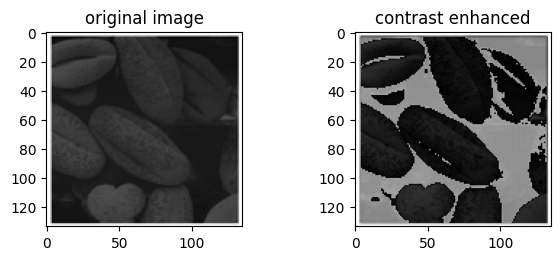

In [ ]:
pic2 = io.imread('imgs/Picture2.png', as_gray=True)

def contrast_enhancement(pic):
    denormalized_img = (pic * 255).astype(np.uint8)
    #enhanced_img = np.where(denormalized_img <= 100, np.clip(1.5 * denormalized_img + 50, 0, 255), denormalized_img).astype(np.uint8)
    for i, row in enumerate(denormalized_img):
        for j, _ in enumerate(row):
            denormalized_img[i][j] = round(1.5 * denormalized_img[i][j] + 50) if denormalized_img[i][j] <= 100 else denormalized_img[i][j] 
    renormalized_img = (denormalized_img / 255.0).astype(np.float32)
    plt.subplot(2,2,2)
    plt.imshow(renormalized_img, cmap='gray')
    plt.title("contrast enhanced")

contrast_enhancement(pic2)
plt.subplot(2,2,1)
plt.imshow(pic2, cmap='gray')
plt.title("original image")
plt.tight_layout()
plt.show()


#Equation:  0 <= x <= 100: 1.5x + 50, 100 < x: x

In [ ]:
'''
3
Gamma Correction
'''


# 

'\n3\nGamma Correction\n'

In [ ]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    
